In [ ]:
UNSW NB-15 DATA SET

In [3]:
#Importing all the required Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pylab as plt
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger


def DataLoading (mypath):
    print ("Loading the data")
    dataframe = pd.read_csv(mypath,header = None,engine = 'python',sep=",")
    dataframe.columns=dataframe.iloc[0]
    dataframe=dataframe.reindex(dataframe.index.drop(0)).reset_index(drop=True)
    dataframe.columns.name=None
    return dataframe

def DataPreprocessing(mydataframe):
    
    # Dropping the duplicates
    recordcount = len(mydataframe)
    print ("Original number of records in the training dataset before removing duplicates is: " , recordcount)
    mydataframe.drop_duplicates(subset=None, inplace=True)  # Python command to drop duplicates
    newrecordcount = len(mydataframe)
    print ("Number of records in the training dataset after removing the duplicates is :", newrecordcount,"\n")

    #Dropping the labels to a different dataset which is used to train the recurrent neural network classifier
    df_X = mydataframe.drop(mydataframe.columns[43],axis=1,inplace = False)
    #print(df_X.head())
    
    df_Y = df_X.drop(mydataframe.columns[0:43],axis=1, inplace = False)

    # Convert Categorial data to the numerical data for the efficient classification
    df_X[df_X.columns[2:5]] = df_X[df_X.columns[2:5]].stack().rank(method='dense').unstack()
    
    df_Y=df_Y.astype(int)
    
    #converting input data into float which is requried in the future stage of building in the network
    df_X = df_X.loc[:,df_X.columns[0:43]].astype(float)
    
    return df_X,df_Y

print ("Loading the IDS Data")
data_path = 'UNSW_NB15_training-set.csv'
dataframe = DataLoading(data_path)

print ("Data Preprocessing of loaded IDS Data")
data_X, data_Y = DataPreprocessing(dataframe)
print(data_Y.dtypes)

X=data_X.rename_axis('ID').values
Y=data_Y.rename_axis('ID').values

Loading the IDS Data
Loading the data
Data Preprocessing of loaded IDS Data
Original number of records in the training dataset before removing duplicates is:  82332
Number of records in the training dataset after removing the duplicates is : 82332 

label    int32
dtype: object


In [7]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import binary_optimization_multi as opt
import numpy as np

from sklearn import svm
from sklearn import model_selection as ms
from tqdm import tqdm


class Evaluate:#setting class
    def __init__(self):#set train_data,label,test_data,label
        self.train_d, self.test_d, self.train_l, self.test_l = train_test_split(X, Y, test_size = 0.2, random_state = 42)

    def evaluate(self,gen):
        """
        Setting of evaluation function.
        Here, the correct answer rate is used.
          anser_label/all_label
        """
        #print("train index:",tr_ix,"\n","test index:",te_ix)
        mask=np.array(gen) > 0
        al_data=np.array([al[mask] for al in self.train_d])
        al_test_data=np.array([al[mask] for al in self.test_d])
        #↑masking with [01]sequence list
        res=svm.LinearSVC().fit(al_data,self.train_l).predict(al_test_data)
        return np.count_nonzero(self.test_l==res)/len(self.test_l)
        #↑evaluate with fittness function
    def check_dimentions(self,dim):#check number of all feature
        if dim==None:
            return len(self.train_d[0])
        else:
            return dim

alg=["BGA","BPSO","BCS","BBA"]
s,g,l=opt.BGA(Eval_Func=Evaluate,n=10,m_i=5)
print("BGA:",g ,"\n",s,"\n",l,"\n\n")

s,g,l=opt.BPSO(Eval_Func=Evaluate,n=10,m_i=5)
print("BPSO:",g ,"\n",s,"\n",l,"\n\n")

s,g,l=opt.BCS(Eval_Func=Evaluate,n=10,m_i=5)
print("BCS:",g ,"\n",s,"\n",l,"\n\n")

s,g,l=opt.BBA(Eval_Func=Evaluate,n=10,m_i=5)
print("BBA:",g ,"\n",s,"\n",l,"\n\n")

C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

30
BGA: [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0] 
 8978.875022772818 
 28 




C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


51
BPSO: [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0] 
 9033.5487338313 
 17 




C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


51
BCS: [0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1] 
 8866.95238962774 
 30 




C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

57
BBA: [1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0] 
 8896.072083561061 
 18 




In [8]:
g=[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
cnt=-1
features=[]
for i in g:
    cnt=cnt+1
    if(i==1):
        features.append(cnt)
print(features)

[0, 1, 2, 3, 4, 6, 8, 10, 11, 19, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


In [28]:
reduced_X=X[:,[0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 36, 38, 40, 42]]
print(reduced_X.shape)
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
red_X=np.reshape(reduced_X, (reduced_X.shape[0],34,1))
X_train, X_test, y_train, y_test = train_test_split(red_X, Y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D , GlobalAveragePooling1D
from keras.utils import np_utils
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(34,1)))
model.add(MaxPooling1D(pool_length=(2)))
model.add(LSTM(70))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
import tensorflow as tf
import keras
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.callbacks import Callback
from sklearn.metrics import recall_score, classification_report
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

model.compile('adam', loss='binary_crossentropy',metrics=['accuracy'])

# callback to find metrics at epoch end
class Metrics(Callback):
    def __init__(self, x, y):
        self.x = x
        self.y = y if (y.ndim == 28 or y.shape[1] == 28) else np.argmax(y, axis=1)
        self.reports = []

    def on_epoch_end(self, epoch, logs={}):
        y_hat = np.asarray(self.model.predict(self.x))
        y_hat = np.where(y_hat > 0.5, 1, 0) if (self.y.ndim == 28 or y_hat.shape[1] == 28)  else np.argmax(y_hat, axis=1)
        report = classification_report(self.y,y_hat,output_dict=True)
        self.reports.append(report)
        return

    # Utility method
    def get(self, metrics, of_class):
        return [report[str(of_class)][metrics] for report in self.reports]


metrics_binary = Metrics(X_train,y_train)
history = model.fit(X_train, y_train, batch_size=32, nb_epoch=30,validation_data=(X_test, y_test),callbacks=[metrics_binary],verbose=1)
loss,accuracy=model.evaluate(X_test,y_test)
print("Loss=",loss,"\nAcuracy=",accuracy*100)

(82332, 34)
(65865, 34, 1)
(16467, 34, 1)
(65865, 1)
(16467, 1)


C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 65865 samples, validate on 16467 samples
Epoch 1/50
65865/65865 [==============================] - 85s 1ms/step - loss: 0.2502 - acc: 0.8945 - val_loss: 0.2011 - val_acc: 0.9155- - ETA: 6s - loss: 0.25 - ETA: 5s - loss: 0.2534 - acc - E
Epoch 2/50
65865/65865 [==============================] - 83s 1ms/step - loss: 0.1930 - acc: 0.9235 - val_loss: 0.2088 - val_acc: 0.9212
Epoch 3/50
65865/65865 [==============================] - 83s 1ms/step - loss: 0.1792 - acc: 0.9292 - val_loss: 0.1632 - val_acc: 0.9342
Epoch 4/50
65865/65865 [==============================] - 84s 1ms/step - loss: 0.1679 - acc: 0.9342 - val_loss: 0.1619 - val_acc: 0.9362
Epoch 5/50
65865/65865 [==============================] - 85s 1ms/step - loss: 0.1611 - acc: 0.9370 - val_loss: 0.1531 - val_acc: 0.9392
Epoch 6/50
65865/65865 [==============================] - 84s 1ms/step - loss: 0.1567 - acc: 0.9390 - val_loss: 0.1458 - val_acc: 0.9415
Epoch 7/50
65865/65865 [==============================] - 84s 1ms/ste

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred.round(), labels=[0,1]))

cm = confusion_matrix(y_test, y_pred.round())
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7418
           1       0.96      0.96      0.96      9049

    accuracy                           0.96     16467
   macro avg       0.96      0.96      0.96     16467
weighted avg       0.96      0.96      0.96     16467

[[7091  327]
 [ 373 8676]]


In [ ]:
NSL KDD DATASET

In [34]:
#Importing all the required Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pylab as plt
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger


def DataLoading (mypath):
    print ("Loading the data")
    dataframe = pd.read_csv(mypath,header = None,engine = 'python',sep=",")
    return dataframe

def DataPreprocessing(mydataframe):
    
    # Dropping the duplicates
    recordcount = len(mydataframe)
    print ("Original number of records in the training dataset before removing duplicates is: " , recordcount)
    mydataframe.drop_duplicates(subset=None, inplace=True)  # Python command to drop duplicates
    newrecordcount = len(mydataframe)
    print ("Number of records in the training dataset after removing the duplicates is :", newrecordcount,"\n")

    #Dropping the labels to a different dataset which is used to train the recurrent neural network classifier
    df_X = mydataframe.drop(mydataframe.columns[41],axis=1,inplace = False)
    df_Y = mydataframe.drop(mydataframe.columns[0:41],axis=1, inplace = False)

    # Convert Categorial data to the numerical data for the efficient classification
    df_X[df_X.columns[1:4]] = df_X[df_X.columns[1:4]].stack().rank(method='dense').unstack()
        
    a=[]
    for x in df_Y[41]:
        if(x=='normal'):
            a.append(1)
        else:
            a.append(0)
    
    del df_Y[41]   
    df_Y[41]=a
    
    #converting input data into float which is requried in the future stage of building in the network
    df_X = df_X.loc[:,df_X.columns[0:41]].astype(float)
    
    return df_X,df_Y

print ("Loading the IDS Data")
data_path = "KDDTrain+_2.csv"
dataframe = DataLoading(data_path)

print ("Data Preprocessing of loaded IDS Data")
data_X, data_Y = DataPreprocessing(dataframe)
Y = np.array(data_Y).astype(int)
X = np.array(data_X)


Loading the IDS Data
Loading the data
Data Preprocessing of loaded IDS Data
Original number of records in the training dataset before removing duplicates is:  125973
Number of records in the training dataset after removing the duplicates is : 125973 



In [37]:
from sklearn.decomposition import PCA

import binary_optimization as opt
import numpy as np

from sklearn import svm
from sklearn import model_selection as ms
from tqdm import tqdm



class Evaluate:
    def __init__(self):
        self.train_l = Y
        self.train_d = X
#         self.test_l = te_l
#         self.test_d=te_d
        self.K = 4
    def evaluate(self,gen):
        mask=np.array(gen) > 0
        al_data=np.array([al[mask] for al in self.train_d])
        #al_test_data=np.array([al[mask] for al in self.test_d])
        kf = ms.KFold(n_splits=self.K)
        s = 0
        for tr_ix,te_ix in kf.split(al_data):
            print("train index:",tr_ix,"\n","test index:",te_ix)
            pca = PCA(0.90)
            m = pca.fit(self.train_l[tr_ix])
            s=m.score(self.train_l[te_ix])#.predict(al_test_data)  self.train_l[te_ix]
        s/=self.K
        return s#np.count_nonzero(self.test_l==res)/len(self.test_l)
    def check_dimentions(self,dim):
        if dim==None:
            return len(self.train_d[0])
        else:
            return dim

print ("Performing the Feature Selection on train data set")
s,g,l=opt.BBA(Eval_Func=Evaluate,n=10,m_i=5)
print("BBA:",g ,"\n",s,"\n",l,)



Performing the Feature Selection on train data set
hiii
train index: [ 31494  31495  31496 ... 125970 125971 125972] 
 test index: [    0     1     2 ... 31491 31492 31493]
train index: [     0      1      2 ... 125970 125971 125972] 
 test index: [31494 31495 31496 ... 62984 62985 62986]
train index: [     0      1      2 ... 125970 125971 125972] 
 test index: [62987 62988 62989 ... 94477 94478 94479]
train index: [    0     1     2 ... 94477 94478 94479] 
 test index: [ 94480  94481  94482 ... 125970 125971 125972]
train index: [ 31494  31495  31496 ... 125970 125971 125972] 
 test index: [    0     1     2 ... 31491 31492 31493]
train index: [     0      1      2 ... 125970 125971 125972] 
 test index: [31494 31495 31496 ... 62984 62985 62986]
train index: [     0      1      2 ... 125970 125971 125972] 
 test index: [62987 62988 62989 ... 94477 94478 94479]
train index: [    0     1     2 ... 94477 94478 94479] 
 test index: [ 94480  94481  94482 ... 125970 125971 125972]
train in

train index: [ 31494  31495  31496 ... 125970 125971 125972] 
 test index: [    0     1     2 ... 31491 31492 31493]
train index: [     0      1      2 ... 125970 125971 125972] 
 test index: [31494 31495 31496 ... 62984 62985 62986]
train index: [     0      1      2 ... 125970 125971 125972] 
 test index: [62987 62988 62989 ... 94477 94478 94479]
train index: [    0     1     2 ... 94477 94478 94479] 
 test index: [ 94480  94481  94482 ... 125970 125971 125972]
iteration...... 1
train index: [ 31494  31495  31496 ... 125970 125971 125972] 
 test index: [    0     1     2 ... 31491 31492 31493]
train index: [     0      1      2 ... 125970 125971 125972] 
 test index: [31494 31495 31496 ... 62984 62985 62986]
train index: [     0      1      2 ... 125970 125971 125972] 
 test index: [62987 62988 62989 ... 94477 94478 94479]
train index: [    0     1     2 ... 94477 94478 94479] 
 test index: [ 94480  94481  94482 ... 125970 125971 125972]
train index: [ 31494  31495  31496 ... 125970 

train index: [ 31494  31495  31496 ... 125970 125971 125972] 
 test index: [    0     1     2 ... 31491 31492 31493]
train index: [     0      1      2 ... 125970 125971 125972] 
 test index: [31494 31495 31496 ... 62984 62985 62986]
train index: [     0      1      2 ... 125970 125971 125972] 
 test index: [62987 62988 62989 ... 94477 94478 94479]
train index: [    0     1     2 ... 94477 94478 94479] 
 test index: [ 94480  94481  94482 ... 125970 125971 125972]
iteration...... 3
train index: [ 31494  31495  31496 ... 125970 125971 125972] 
 test index: [    0     1     2 ... 31491 31492 31493]
train index: [     0      1      2 ... 125970 125971 125972] 
 test index: [31494 31495 31496 ... 62984 62985 62986]
train index: [     0      1      2 ... 125970 125971 125972] 
 test index: [62987 62988 62989 ... 94477 94478 94479]
train index: [    0     1     2 ... 94477 94478 94479] 
 test index: [ 94480  94481  94482 ... 125970 125971 125972]
train index: [ 31494  31495  31496 ... 125970 

train index: [ 31494  31495  31496 ... 125970 125971 125972] 
 test index: [    0     1     2 ... 31491 31492 31493]
train index: [     0      1      2 ... 125970 125971 125972] 
 test index: [31494 31495 31496 ... 62984 62985 62986]
train index: [     0      1      2 ... 125970 125971 125972] 
 test index: [62987 62988 62989 ... 94477 94478 94479]
train index: [    0     1     2 ... 94477 94478 94479] 
 test index: [ 94480  94481  94482 ... 125970 125971 125972]
BBA: [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1] 
 -0.18083372203886197 
 26


In [38]:
g=[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1]
cnt=-1
features=[]
for i in g:
    cnt=cnt+1
    if(i==1):
        features.append(cnt)
print(features)


[0, 1, 2, 3, 5, 7, 8, 11, 12, 13, 16, 20, 22, 23, 24, 27, 28, 29, 30, 33, 34, 35, 37, 38, 39, 40]


(125973, 26)
(100778, 26, 1)
(25195, 26, 1)
(100778, 1)
(25195, 1)


C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
C:\Users\priya\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 100778 samples, validate on 25195 samples
Epoch 1/50
100778/100778 [==============================] - 105s 1ms/step - loss: 0.0807 - acc: 0.9716 - val_loss: 0.0567 - val_acc: 0.9771
Epoch 2/50
100778/100778 [==============================] - 104s 1ms/step - loss: 0.0453 - acc: 0.9837 - val_loss: 0.0480 - val_acc: 0.9833
Epoch 3/50
100778/100778 [==============================] - 103s 1ms/step - loss: 0.0360 - acc: 0.9874 - val_loss: 0.0352 - val_acc: 0.9892
Epoch 4/50
100778/100778 [==============================] - 104s 1ms/step - loss: 0.0319 - acc: 0.9889 - val_loss: 0.0355 - val_acc: 0.9894
Epoch 5/50
100778/100778 [==============================] - 104s 1ms/step - loss: 0.0275 - acc: 0.9903 - val_loss: 0.0399 - val_acc: 0.9878
Epoch 6/50
100778/100778 [==============================] - 104s 1ms/step - loss: 0.0249 - acc: 0.9913 - val_loss: 0.0334 - val_acc: 0.9892
Epoch 7/50
100778/100778 [==============================] - 105s 1ms/step - loss: 0.0238 - acc: 0.9916 - val_

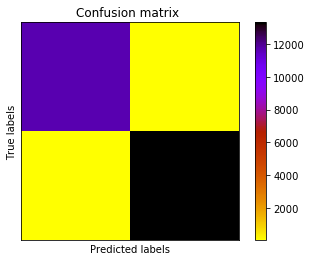

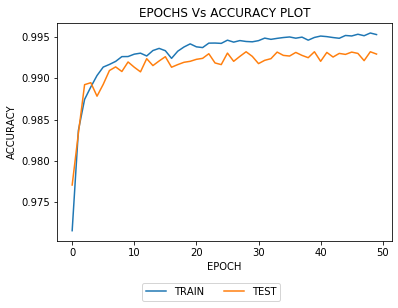

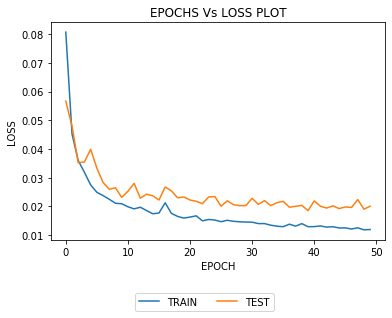

In [40]:
reduced_X=X[:,[0, 1, 2, 3, 5, 7, 8, 11, 12, 13, 16, 20, 22, 23, 24, 27, 28, 29, 30, 33, 34, 35, 37, 38, 39, 40]]
print(reduced_X.shape)
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
red_X=np.reshape(reduced_X, (reduced_X.shape[0],26,1))
X_train, X_test, y_train, y_test = train_test_split(red_X, Y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D , GlobalAveragePooling1D
from keras.utils import np_utils
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(26,1)))
model.add(MaxPooling1D(pool_length=(2)))
model.add(LSTM(70))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
import tensorflow as tf
import keras
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.callbacks import Callback
from sklearn.metrics import recall_score, classification_report
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

model.compile('adam', loss='binary_crossentropy',metrics=['accuracy'])

# callback to find metrics at epoch end
class Metrics(Callback):
    def __init__(self, x, y):
        self.x = x
        self.y = y if (y.ndim == 26 or y.shape[1] == 26) else np.argmax(y, axis=1)
        self.reports = []

    def on_epoch_end(self, epoch, logs={}):
        y_hat = np.asarray(self.model.predict(self.x))
        y_hat = np.where(y_hat > 0.5, 1, 0) if (self.y.ndim == 26 or y_hat.shape[1] == 26)  else np.argmax(y_hat, axis=1)
        report = classification_report(self.y,y_hat,output_dict=True)
        self.reports.append(report)
        return

    # Utility method
    def get(self, metrics, of_class):
        return [report[str(of_class)][metrics] for report in self.reports]


metrics_binary = Metrics(X_train,y_train)
history = model.fit(X_train, y_train, batch_size=32, nb_epoch=50,validation_data=(X_test, y_test),callbacks=[metrics_binary],verbose=1)
loss,accuracy=model.evaluate(X_test,y_test)
print("Loss=",loss,"\nAcuracy=",accuracy*100)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred.round(), labels=[0,1]))

cm = confusion_matrix(y_test, y_pred.round())
print(cm)

